### Fashion-MNIST 데이터셋 다운받기

In [4]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# Fashion-MNIST 데이터 다운로드
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


### 데이터 그려보기

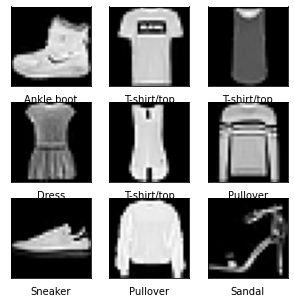

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 전처리 및 검증 데이터셋 만들기

In [6]:
# 0~1 범위로 만들기
x_trian = x_train / 255
x_test = x_test / 255

In [7]:
from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# 검증 데이터셋 만들기
from sklearn.model_selection import train_test_split

In [9]:
# 학습/테스트 데이터를 0.7/0.3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

### 첫 번째 모델 구성하기

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [11]:
first_model = Sequential()
# 입력 데이터의 형태 꼭 명시하기
first_model.add(Flatten(input_shape = (28, 28)))    # (28, 28) -> (28 * 28)
first_model.add(Dense(64, activation= 'relu'))      # 64개의 출력을 가지는 Dense층
first_model.add(Dense(32, activation= 'relu'))      # 32개의 출력을 가지는 Dense층
first_model.add(Dense(10, activation= 'softmax'))      # 10개의 출력을 가지는 신경망

2022-06-13 01:13:02.479982: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 학습 과정 설정 및 학습하기

In [12]:
first_model.compile(optimizer='adam', # 옵티마이저: Adam
                    # 손실함수: categorical_crossentropy
                    loss  = 'categorical_crossentropy',
                    # 모니터링 할 평가지표: acc
                    metrics=['acc'])

In [13]:
first_history = first_model.fit(x_train, y_train,
                                epochs = 30,
                                batch_size = 128,
                                validation_data = (x_val, y_val))


Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 4.8674 - acc: 0.6817 - val_loss: 1.4613 - val_acc: 0.7428
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 1.0855 - acc: 0.7632 - val_loss: 0.8906 - val_acc: 0.7648
Epoch 3/30
329/329 [==============================] - 1s 2ms/step - loss: 0.7417 - acc: 0.7921 - val_loss: 0.6833 - val_acc: 0.8052
Epoch 4/30
329/329 [==============================] - 1s 2ms/step - loss: 0.6083 - acc: 0.8102 - val_loss: 0.6259 - val_acc: 0.8177
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.5335 - acc: 0.8259 - val_loss: 0.5814 - val_acc: 0.8182
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4915 - acc: 0.8343 - val_loss: 0.5279 - val_acc: 0.8364
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4670 - acc: 0.8390 - val_loss: 0.5266 - val_acc: 0.8260
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

### 두 번째 모델 구성하기

In [20]:
second_model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 한다
second_model.add(Flatten(input_shape = (28, 28)))    # (28, 28) -> (28 * 28)
second_model.add(Dense(128, activation= 'relu'))      # 128개의 출력을 가지는 Dense층
second_model.add(Dense(64, activation= 'relu'))      # 64개의 출력을 가지는 Dense층
second_model.add(Dense(32, activation= 'relu'))      # 32개의 출력을 가지는 Dense층
second_model.add(Dense(10, activation= 'softmax'))      # 10개의 출력을 가지는 신경망

In [21]:
second_model.compile(optimizer='adam', # 옵티마이저: Adam
                    # 손실함수: categorical_crossentropy
                    loss  = 'categorical_crossentropy',
                    # 모니터링 할 평가지표: acc
                    metrics=['acc'])

In [22]:
second_history = second_model.fit(x_train, y_train,
                                epochs = 30,
                                batch_size = 128,
                                validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 3.1142 - acc: 0.7025 - val_loss: 0.9272 - val_acc: 0.7813
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.7779 - acc: 0.7864 - val_loss: 0.6934 - val_acc: 0.8000
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.5888 - acc: 0.8139 - val_loss: 0.6453 - val_acc: 0.7920
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.5007 - acc: 0.8323 - val_loss: 0.5011 - val_acc: 0.8404
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4399 - acc: 0.8478 - val_loss: 0.5191 - val_acc: 0.8382
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4234 - acc: 0.8503 - val_loss: 0.6388 - val_acc: 0.7751
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4182 - acc: 0.8527 - val_loss: 0.4881 - val_acc: 0.8407
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

### 두 모델의 학습 과정 그려보기

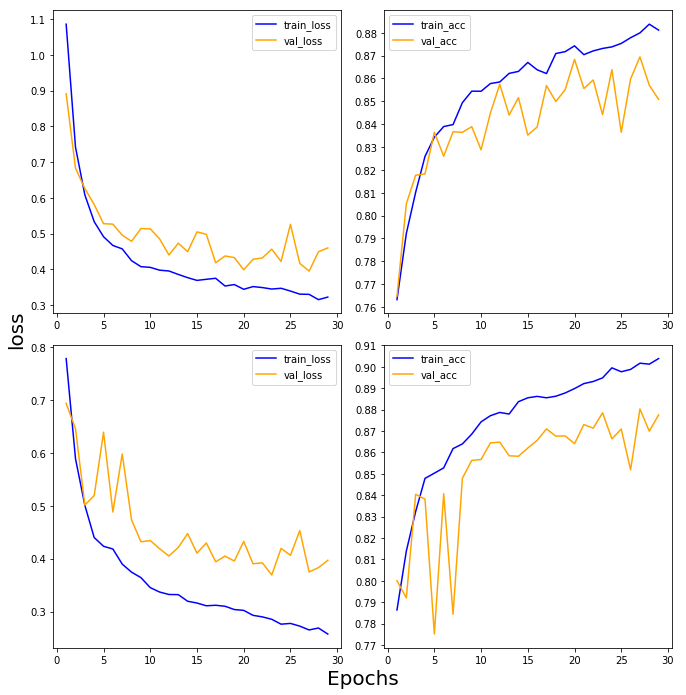

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())

    epochs = range(1,epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False,
                    bottom=False, left=False, right=False)
            
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:],
                    color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:],
                    color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()

draw_loss_acc(first_history, second_history, 30)
